# Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
loansdata=pd.read_csv('LoansData.csv')

In [7]:
loansdata.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [8]:
loansdata.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [11]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [13]:
loansdata.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [17]:
loansdata.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

<Axes: >

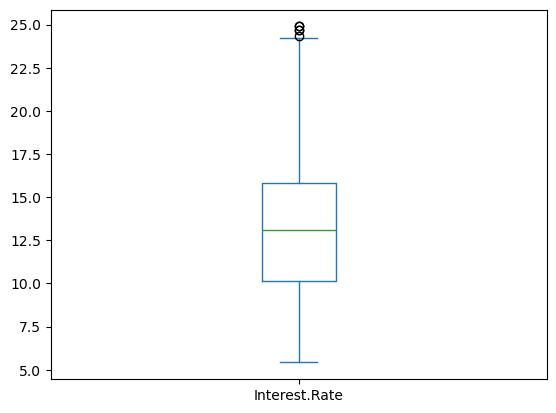

In [23]:
loansdata['Interest.Rate'].plot(kind ='box')

# Business Problem 1

**A.Interest rate is varied for different loan amounts(Less intrest charged for hogh loans amounts).**

**B.Loan length is directly effecting intrest rate.**

**C.Intrest rate varies for different purpose of loans.**

**D.There is relationship between FICO scores and Home Ownership.It means that,people with owing home will have high FICO scores.**

### A.Interest rate is varied for different loan amounts(Less intrest charged for hogh loans amounts)

In [21]:
#Firstly, in dataset loansdata we have col "Interest Rate" which is object,
#To convert "Interest Rate" column to Float

loansdata["Interest.Rate"] = loansdata["Interest.Rate"].str.replace("%","") # Here replacing % sign with nothing(with"")
#Converting dtype to float
loansdata["Interest.Rate"] = loansdata["Interest.Rate"].astype("float")

In [22]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   float64
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

# EDA(Exploratory Data analysis)

In [27]:
#Missing value treatment in columns interest rate and amount requested
loansdata["Interest.Rate"].fillna(loansdata["Interest.Rate"].mean(),inplace = True)
loansdata["Amount.Requested"].fillna(loansdata["Amount.Requested"].mean(),inplace = True)

**Define Null Hypothesis (H0)**

**H0 = Interest rate does not vary for different loan amount(Less intrest is not charged for high loan amount).**

**Define Alternate Hypothesis (H1)**

**H1 = interest rate is varied for different loan amount(Less interest charged for high loan amount).**

In [30]:
# Taking Confidence interval at 95%, and p-value 0.05

# Finding the relation between these two continious variable using pearson test.

stats.pearsonr(loansdata["Interest.Rate"], loansdata["Amount.Requested"])

PearsonRResult(statistic=0.33244640596656916, pvalue=1.4148683739770683e-65)

 I got p-value smaller than 0.05 thatb means with 95% confidence, I will reject the null hypothesis

In [31]:
# Conclusion
# Interest rate is varied for different loan amounts(less intrest charged for high loan amounts).

print("Conclusion :")
print("Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)")


Conclusion :
Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)


### B.Loan length is directly effecting intrest rate.

In [33]:
# We have only 2 type of loan length with us in the data i.e.
# 36 months and 60 months
# Putting these two periods in different variables (loan_len_36 and loan_len_60)
#so that i can apply test on them to know if they are effectving intrest rate or not

loan_len_36 = loansdata.loc[loansdata["Loan.Length"]=='36 months','Interest.Rate']
loan_len_60 = loansdata.loc[loansdata["Loan.Length"]=='60 months','Interest.Rate']

**Define Null hypothesis(H0)**

**Loan length is not effecting intrest rate.**

**Define Alternate Hypothesis(H1)**

**loan length is directly effecting intrest rate**

**Taking Confidence Level at 95%,and p-value 0.05**

**Performing statistical analysis using t-test**

In [34]:
stats.ttest_ind(loan_len_36,loan_len_60)

TtestResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110, df=2498.0)

I got p-value smaller than 0.05 that means with 95% confidence, I will Reject the null hypothesis

In [35]:
print("Conclusion :")
print("Loan length is directly effecting intrest rate.")

Conclusion :
Loan length is directly effecting intrest rate.


### C.Intrest rate varies for different purpose of loans

**Defining Null Hypotheis (H0)**

**Intrest rate does not vary for different purpose of loans.**

**Defining Alternate Hypothesis (H1)**

**Intrest rate varies for different purpose of loans.**

In [37]:
# Taking Confidence Level at 95%, and p-value 0.05

# Finding relation between 1 categorical and 1 continous variable using Spearman test

stats.spearmanr(loansdata["Interest.Rate"],loansdata["Loan.Purpose"])

SignificanceResult(statistic=-0.06035663579266386, pvalue=0.0025354766301471797)

I got p-value smaller than 0.05 that means with 95% confidence, I will reject the null hypothesis

In [38]:
print("Conclusion :")
print("Intrest rate varies for different purpose of loans.")

Conclusion :
Intrest rate varies for different purpose of loans.


### D.There is relationship between FICO scores and Home Ownership.It means that,people with owing home will have high FICO scores.

In [39]:
# Finding missing value in FICO range
loansdata["FICO.Range"].isna().sum()

2

In [40]:
loansdata["FICO.Range"].describe()

count        2498
unique         38
top       670-674
freq          171
Name: FICO.Range, dtype: object

In [41]:
# As show in the difference is (670-674), so replacing missing values with the range
loansdata["FICO.Range"].fillna("670-674",inplace = True)

**Defining Null Hypothesis(H0)**

**There is no relationship between FICO scores and Home Ownership**

**Defining Alternative Hypothesis (H1)**

**There is relationship between FICO scores and Home Ownership**

In [42]:
#Taking Confidence level at 95%, and p-value 0.05
#Creating a table for these 2 cols and saving to var name relation_FICO_and_homeownership

relation_FICO_and_homeownership = pd.crosstab(loansdata["Home.Ownership"],loansdata["FICO.Range"])

In [44]:
# Finding relationship between these two columns (Home ownership and Fico range) using chi-square test

stats.chi2_contingency(relation_FICO_and_homeownership)

Chi2ContingencyResult(statistic=473.29621816347037, pvalue=1.1047530717463926e-35, dof=148, expected_freq=array([[2.29491797e+00, 1.37695078e+00, 4.58983593e-01, 1.83593437e+00,
        5.73729492e+01, 6.65526210e+01, 7.94041617e+01, 7.61912765e+01,
        7.20604242e+01, 6.24217687e+01, 6.42577031e+01, 7.02244898e+01,
        6.01268507e+01, 6.15038015e+01, 5.09471789e+01, 4.26854742e+01,
        5.23241297e+01, 4.31444578e+01, 4.31444578e+01, 2.98339336e+01,
        2.43261305e+01, 2.47851140e+01, 2.79979992e+01, 2.11132453e+01,
        2.11132453e+01, 1.65234094e+01, 7.80272109e+00, 1.00976391e+01,
        1.28515406e+01, 8.72068828e+00, 9.17967187e+00, 5.96678671e+00,
        5.96678671e+00, 5.04881953e+00, 3.67186875e+00, 2.75390156e+00,
        4.58983593e-01, 4.58983593e-01],
       [2.00080032e-03, 1.20048019e-03, 4.00160064e-04, 1.60064026e-03,
        5.00200080e-02, 5.80232093e-02, 6.92276911e-02, 6.64265706e-02,
        6.28251301e-02, 5.44217687e-02, 5.60224090e-02, 6.122

I got p-value smaller than 0.05 that means 95% confidence, I will reject the null hypothesis

In [45]:
print("Conclusion :")
print("There is relationship between FICO scores and Home Ownership. It means that, people with owning home will have high FICO scores.")

Conclusion :
There is relationship between FICO scores and Home Ownership. It means that, people with owning home will have high FICO scores.


# Business Problem 2

We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [47]:
price_quotes = pd.read_csv('Price_Quotes.csv')

In [48]:
price_quotes.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [49]:
price_quotes.describe()

,Order_Number,Barry_Price,Mary_Price
count,12.000000,12.000000,12.000000
mean,6.500000,124.333333,114.750000
std,3.605551,20.698412,11.054616
min,1.000000,94.000000,97.000000
25%,3.750000,106.750000,107.000000
50%,6.500000,131.000000,114.000000
75%,9.250000,140.500000,121.000000
max,12.000000,152.000000,133.000000


**Defining Null Hypothesis(H0)**

**There is no difference in the average price quotes provied by Mary and Barry**

**Defining Alternative Hypothesis (H1)**

**There is difference in the average price quotes provided by Mary and Barry**

In [53]:
# Taking Confidence level at 95%, and p-value0.05
#Finding relation between Bary price and Mary price using t-test

stats.ttest_rel(price_quotes["Mary_Price"],price_quotes["Barry_Price"])

TtestResult(statistic=-2.5213765108923494, pvalue=0.02840588045242053, df=11)

I got p-value smaller than 0.05 that means with 95% confidence, I will reject the null hypothesis

In [55]:
print("Conclusion: ") 
print("Yes,there is difference between the average price quotes provided by Marry and Barry")

Conclusion: 
Yes,there is difference between the average price quotes provided by Marry and Barry


# Business Problem 3

Determine what effect,if any,the reengineering effort had on the incidence behavioural problems and staff urnover.i.e, To determine if the reengineering effort changed the critical incidence rate.Is there evidence that the critical incidence rate improved?

In [56]:
treatment_facility = pd.read_csv('Treatment_Facility.csv')

In [57]:
treatment_facility.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [58]:
# Data understanding
# AS we have two cols VAR4 and VAR5 in the dataset un-named and technically irrelevant(according to there names)
# I am considering these two columns as "TRFF" and "CI" as I was given in the Data Available section of Business Problem

treatment_facility.rename(columns = {"VAR4":"TRFF", "VAR5":"CI"},inplace = True)

In [59]:
treatment_facility.head()

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


**Defining Null Hypothesis(H0)**

**There is no effect post the reengineer**

**Defining Alternative Hypothesis (H1)**

**There is effect post the reengineer**

In [64]:
# Taking Confidence Interval at 95%, and p-value 0.05
# Differentiating the Reengineer column to "prior" and "post"

prior = treatment_facility[treatment_facility["Reengineer"]=="Prior"]["CI"]
post = treatment_facility[treatment_facility["Reengineer"]=="Post"]["CI"]

In [65]:
stats.ttest_ind(prior,post)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

I got p-value greater than 0.05 that means with 95% confidence, I will fail to accept the null hupothesis

In [66]:
print("Conculision :")
print("There is insufficient evidence to conclude that the reengineering effort resulted in a significant change in the critical incidence rate")

Conculision :
There is insufficient evidence to conclude that the reengineering effort resulted in a significant change in the critical incidence rate


# Business Problem 4

We will focus on the prioritization system.If the system is workinhg,then high priority jobs,on average,should be completed more quickly than low priority jobs.Use the data provided to determine whether this is ,in fact,occurring.

In [68]:
priority_assessment = pd.read_csv('Priority_Assessment.csv')

In [69]:
priority_assessment.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [70]:
priority_assessment.describe()

,Days
count,642.000000
mean,2.946262
std,6.687063
min,0.100000
25%,0.200000
50%,0.600000
75%,2.500000
max,72.900000


In [71]:
# Dividing the priority on the basis of High, Medium, Low

high = priority_assessment[priority_assessment["Priority"]=="High"].Days
medium = priority_assessment[priority_assessment["Priority"]=="Medium"].Days
low = priority_assessment[priority_assessment["Priority"]=="Low"].Days

**Defining Null Hypothesis(H0)**

**The prioritization system is not working**

**Defining Alternative Hypothesis (H1)**

**The prioritization system is working**

In [72]:
# Taking Confidence Level at 95%, and p-value 0.05
# As i have 3 groups with, i will use ANOVA test -  Analysis of Variance (basically helps in finding the variation between groups)

stats.f_oneway(high,medium,low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

I got p-value greater than 0.05 that means with 95% confidence, I will fail to reject the null hypothesis

# Business Problem 5

**A. What is the overall level of customer satisfacion?**

**B. What factors are linked to satisfaction?**

**C. What is the demographic profile of film on the Rock patrons?**

**D. In what media outlet(s) should the film be advertised?**

### A. What is the overall level of customer satisfacion?

In [74]:
films = pd.read_csv('Films.csv')

In [78]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [81]:
# replace values
films.Gender.replace({"1":"Male","2":"Female"},inplace = True)
films.Marital_Status.replace({"1":"Married","2":"Single"},inplace = True)
films.replace('Slngle','Single',inplace = True)

In [82]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [83]:
films.Overall.value_counts()

Overall
2.0    160
1.0    151
3.0     12
5.0      4
4.0      1
Name: count, dtype: int64

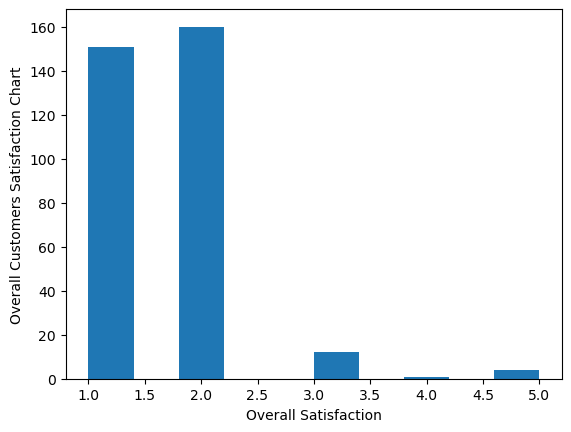

In [84]:
plt.hist(films.Overall)
plt.xlabel("Overall Satisfaction")
plt.ylabel("Overall Customers Satisfaction Chart")
plt.show()

Here we can clearly saw that Overall level of customer's satisfcation is mostly 2 and 1 that means, on a given scale(in the question) customer's Overall Satisfaction is GOOD and EXCELLENT

In [85]:
print("Conclusion :")
print("Customer's Overall Satisfaction is GOOD and EXCELLENT")

Conclusion :
Customer's Overall Satisfaction is GOOD and EXCELLENT


**Taking columns SINAGE, PARKING and CLEAN one by one with col Overall in order to getthe factors that are affecting Customer's Satisfaction**

**Situation 1 : checkin link between col Overall and Sinage**


**Defining Null Hypothesis (H0)**


**NO relation between Col Overall and Sinage**


**Defining Alternate Hypothesis (H1)**


**Relationship is Present between col Overall and Sinage**


In [86]:
# Taking Confidence Level at 95%, and p-value 0.05
# taking these two columns in a separate variable

overall_and_single = pd.crosstab(index=films.Overall,columns=(films.Sinage))

In [87]:
# As these two are categorical variable, so using chi-square test

stats.chi2_contingency(overall_and_single)

Chi2ContingencyResult(statistic=124.81695331531306, pvalue=6.47639805161236e-19, dof=16, expected_freq=array([[5.18348624e+01, 7.11009174e+01, 2.20183486e+01, 2.75229358e+00,
        2.29357798e+00],
       [5.52905199e+01, 7.58409786e+01, 2.34862385e+01, 2.93577982e+00,
        2.44648318e+00],
       [4.14678899e+00, 5.68807339e+00, 1.76146789e+00, 2.20183486e-01,
        1.83486239e-01],
       [3.45565749e-01, 4.74006116e-01, 1.46788991e-01, 1.83486239e-02,
        1.52905199e-02],
       [1.38226300e+00, 1.89602446e+00, 5.87155963e-01, 7.33944954e-02,
        6.11620795e-02]]))

**I got p-value smaller than 0.05 that means with 95% confidence, I reject the null hypothesis**

**Conclusion**

**Relationship is Present between col Overall and Sinage**

**Situation 2 :**

**checkin link between col Overall and Parking**

**Defining Null Hypothesis (H0)**

**NO relation between Col Overall and Parking**

**Defining Alternate Hypothesis (H1)**

**Relationship is Present between col Overall and Parking**

In [88]:
# Taking Confidence Level at 95%, and p-value 0.05
overall_and_parking= pd.crosstab(index=films.Overall,columns=(films.Parking))

In [89]:
# As these two are categorical variable, so using chi-square test
stats.chi2_contingency(overall_and_parking)

Chi2ContingencyResult(statistic=229.47943657632044, pvalue=8.162450437897989e-40, dof=16, expected_freq=array([[6.18776758e+01, 7.06513761e+01, 1.33914373e+01, 3.23241590e+00,
        1.84709480e+00],
       [6.51559633e+01, 7.43944954e+01, 1.41009174e+01, 3.40366972e+00,
        1.94495413e+00],
       [4.91743119e+00, 5.61467890e+00, 1.06422018e+00, 2.56880734e-01,
        1.46788991e-01],
       [4.09785933e-01, 4.67889908e-01, 8.86850153e-02, 2.14067278e-02,
        1.22324159e-02],
       [1.63914373e+00, 1.87155963e+00, 3.54740061e-01, 8.56269113e-02,
        4.89296636e-02]]))

**I got p-value smaller than 0.05 that means with 95% confidence, I reject the null hypothesis.**

**Conclusion**
  
**Relationship is Present between col Overall and Parking**

**Situation 3 :**
    
**checkin link between col Overall and Clean**

**Defining Null Hypothesis (H0)**

**NO relation between Col Overall and Clean**

**Defining Alternate Hypothesis (H1)**

**Relationship is Present between col Overall and Clean**

In [91]:
# Taking Confidence Level at 95%, and p-value 0.05
# taking these two columns in a separate variable
overall_and_clean =pd.crosstab(index=films.Overall,columns=(films.Clean))
# As these two are categorical variable, so using chi-square test
stats.chi2_contingency(overall_and_clean)

Chi2ContingencyResult(statistic=125.17708834561675, pvalue=5.517448379868074e-19, dof=16, expected_freq=array([[6.64954128e+01, 7.01896024e+01, 1.10825688e+01, 2.30886850e+00,
        9.23547401e-01],
       [7.00183486e+01, 7.39082569e+01, 1.16697248e+01, 2.43119266e+00,
        9.72477064e-01],
       [5.28440367e+00, 5.57798165e+00, 8.80733945e-01, 1.83486239e-01,
        7.33944954e-02],
       [4.40366972e-01, 4.64831804e-01, 7.33944954e-02, 1.52905199e-02,
        6.11620795e-03],
       [1.76146789e+00, 1.85932722e+00, 2.93577982e-01, 6.11620795e-02,
        2.44648318e-02]]))

**I got p-value smaller than 0.05 that means with 95% confidence, I reject the null hypothesis.**

**Final Conclusion**

**What factors are linked to satisfaction?**

**ANS -> There is a significant correlation between the overall satisfaction level and various factors such as Sinage, Cleaniness and Parking and these factors are responsible to affect the Overall Satisfaction of the Customer**

**There is a significant correlation between the overall satisfaction level and various factors such as Sinage, Cleaniness and Parking and these factors are responsible to affect the Overall Satisfaction of the Customer**

In [108]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [109]:
# Taking counts of Gender
films.Gender.value_counts()

Gender
Female    213
Male      117
Name: count, dtype: int64

In [110]:
# Female Percentage
213/films.shape[0]*100

64.54545454545455

In [111]:
# Male percentage
117/films.shape[0]*100

35.45454545454545

In [112]:
# Taking counts of Marital_Status
films.Marital_Status.value_counts()

Marital_Status
Single     228
Married    100
Name: count, dtype: int64

In [113]:
# taking percentage of Marital_Status
# Singles Percentage
228/films.shape[0]*100

69.0909090909091

In [114]:
# Married Percentage
100/films.shape[0]*100

30.303030303030305

In [115]:
# Taking most likely age group
films.Age.value_counts()

Age
2.0    175
3.0    117
1.0     26
4.0     10
Name: count, dtype: int64

In [116]:
# Taking most likely Income group
films.Income.value_counts()


Income
1.0    142
3.0     90
2.0     82
Name: count, dtype: int64

In [117]:
print("         Demographic Profile of Film on the Rocks Patrons :")
print(" ")
print("There are Total of 213 (64.5%) Female Profiles on The Rock Patrons ")
print("There are Total of 117 (35.5%) Males Profile on The Rock Patrons")
print("There are Total of 228 (69.9%) Single Profiles on The Rock Patrons")
print("There are Total of 100 (30.1%) Married Profiles on The Rock Patrons")
print("There are More People from Age group 2 (13-30 years) on The Rock Patrons")
print("There are More People with Income group 1 (Less than $50,000) on The Rock Patrons")

         Demographic Profile of Film on the Rocks Patrons :
 
There are Total of 213 (64.5%) Female Profiles on The Rock Patrons 
There are Total of 117 (35.5%) Males Profile on The Rock Patrons
There are Total of 228 (69.9%) Single Profiles on The Rock Patrons
There are Total of 100 (30.1%) Married Profiles on The Rock Patrons
There are More People from Age group 2 (13-30 years) on The Rock Patrons
There are More People with Income group 1 (Less than $50,000) on The Rock Patrons


In [118]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [119]:
films.Hear_About.value_counts()

Hear_About
5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: count, dtype: int64

In [120]:
# As we have mentioned the Hear About range in the Data Available Column in Business Problem as : 
    #1 = television; 2 =newspaper; 3 = radio; 4 = website; 5 = word of mouth

# And we have multiple instances where Hear_about value is given as (2,5),(3,4),(4,5)...etc
    # and many these values have 5 in it and also the maximum occurance out of these numbers is also 5
    # So, replacing (2,5),(3,4),(4,5)...etc these values with 5
    
films.Hear_About.replace({'1,5':'5','2,5':'5', '3,4':'5','3,5':'5', '4,5':'5','5,4':'5'}, inplace=True)

In [121]:
films.Hear_About.value_counts()

Hear_About
5    234
4     41
1     22
3     14
2     12
Name: count, dtype: int64

In [123]:
#Converting Hear_about col to float to make a histogram chart 
films.Hear_About=films.Hear_About.astype("float")

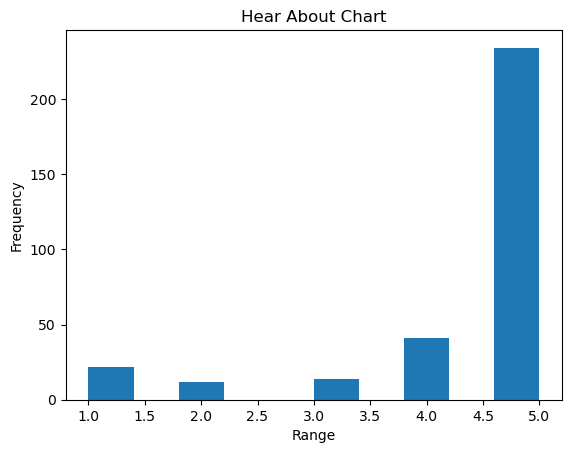

In [124]:
plt.hist(films.Hear_About)
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Hear About Chart')
plt.show()

In [125]:
# we have got the 5 (Word  of moth) with maximum frequency but it does not comes under media category
# So, taking the next category i.e, 4 (Website)  with second highest frequency and category 1 i.e, (Television) as the BEst media Outlet to advertise 
print("The Best Media Outlets to Advertise the film series should be WEBSITE and TELEVISION")

The Best Media Outlets to Advertise the film series should be WEBSITE and TELEVISION
